## 멜론 시대별 차트로 보는 장르별 선호 흐름

In [361]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import time

In [362]:
names = ['Date', '애시드/퓨전/팝', '드라마OST', '클래식', '인디음악', '영화OST', '발라드', '댄스', '록/메탈',
         'R&B/Soul', '일렉트로니카', '랩/힙합', 'EDM', 'POP', 'J-POP', '성인가요', '재즈', '뉴에이지',
         '포크/블루스', '만화/게임OST', '-']

In [363]:
def get_data_frame():
    # print("current : ", year, month)
    load_file = "C:/Users/jay/Jay/기말플젝/final_data/final.csv"

    try:
        data = pd.read_csv(load_file, encoding='cp949',
                           names=names, header=None)
    except UnicodeError:
        try:
            data = pd.read_csv(load_file, encoding='utf-8',
                               names=names, header=None)
        except Exception as e:
            print(e)
    return data

In [364]:
def get_element_analysis(data_frame, ele):
    res = []
    for i in range(0, len(data_frame)-1):
       res.append([data_frame.get('Date')[i]] + [data_frame.get(ele[0])[i]])
    df = pd.DataFrame(res, columns=['Date', 'freq'])
    data = np.array(res)
    print(data)

In [365]:
def get_keys(data):
    keys = []
    for key in data.keys():
        if key != 'Date':
            keys.append([key])
    return keys

In [366]:
data = get_data_frame()
mellon_df = pd.DataFrame(data, columns=names)
elements = get_keys(data)

In [367]:
print("멜론 시대별 차트 데이터 크기 : ", mellon_df.shape)

멜론 시대별 차트 데이터 크기 :  (240, 21)


In [368]:
print(mellon_df.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 240 entries, nan to 238.0
Data columns (total 21 columns):
Date        240 non-null object
애시드/퓨전/팝    240 non-null object
드라마OST      240 non-null object
클래식         240 non-null object
인디음악        240 non-null object
영화OST       240 non-null object
발라드         240 non-null object
댄스          240 non-null object
록/메탈        240 non-null object
R&B/Soul    240 non-null object
일렉트로니카      240 non-null object
랩/힙합        240 non-null object
EDM         240 non-null object
POP         240 non-null object
J-POP       240 non-null object
성인가요        240 non-null object
재즈          240 non-null object
뉴에이지        240 non-null object
포크/블루스      240 non-null object
만화/게임OST    240 non-null object
-           240 non-null object
dtypes: object(21)
memory usage: 41.2+ KB
None


In [369]:
mellon_df.dtypes

Date        object
애시드/퓨전/팝    object
드라마OST      object
클래식         object
인디음악        object
영화OST       object
발라드         object
댄스          object
록/메탈        object
R&B/Soul    object
일렉트로니카      object
랩/힙합        object
EDM         object
POP         object
J-POP       object
성인가요        object
재즈          object
뉴에이지        object
포크/블루스      object
만화/게임OST    object
-           object
dtype: object

In [370]:
mellon_df['Date'] = pd.to_datetime(mellon_df['Date'], dayfirst=True, errors='coerce')
mellon_df['Date'] = mellon_df['Date']

In [371]:
mellon_df['Date'].head()

NaN          NaT
0.0   2000-01-01
1.0   2000-02-01
2.0   2000-03-01
3.0   2000-04-01
Name: Date, dtype: datetime64[ns]

In [372]:
mellon_df  = mellon_df.dropna(axis = 0)

In [373]:
mellon_df

,Date,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,...,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
0.0,2000-01-01,0.0,0.0,0.0,0.0,0.0,34.61538461538461,28.205128205128204,19.230769230769234,3.8461538461538463,...,10.256410256410255,0.0,0.0,0.0,0.0,0.0,1.282051282051282,1.282051282051282,0.0,1.282051282051282
1.0,2000-02-01,0.0,0.0,0.0,1.5151515151515151,0.0,34.84848484848485,33.33333333333333,18.181818181818183,3.0303030303030303,...,7.575757575757576,0.0,0.0,0.0,0.0,0.0,1.5151515151515151,0.0,0.0,0.0
2.0,2000-03-01,0.0,1.4705882352941175,0.0,1.4705882352941175,0.0,41.17647058823529,26.47058823529412,17.647058823529413,2.941176470588235,...,7.352941176470589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4705882352941175
3.0,2000-04-01,0.0,1.4084507042253522,0.0,1.4084507042253522,0.0,39.436619718309856,30.985915492957744,15.492957746478872,4.225352112676056,...,7.042253521126761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,2000-05-01,0.0,1.3333333333333335,0.0,0.0,0.0,40.0,29.333333333333332,12.0,6.666666666666667,...,10.666666666666668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234.0,2019-07-01,0.0,4.166666666666666,0.0,8.333333333333332,3.3333333333333335,29.166666666666668,15.833333333333332,5.833333333333333,8.333333333333332,...,10.833333333333334,0.0,10.833333333333334,0.0,0.8333333333333334,0.0,0.0,1.6666666666666667,0.0,0.0
235.0,2019-08-01,0.0,11.023622047244094,0.0,7.874015748031496,1.574803149606299,29.133858267716533,14.960629921259844,3.937007874015748,7.874015748031496,...,11.811023622047244,0.0,7.874015748031496,0.0,0.7874015748031495,0.0,0.0,2.3622047244094486,0.0,0.0
236.0,2019-09-01,0.0,10.606060606060606,0.0,11.363636363636363,1.5151515151515151,33.33333333333333,11.363636363636363,7.575757575757576,6.8181818181818175,...,9.090909090909092,0.0,6.8181818181818175,0.0,0.0,0.0,0.0,0.7575757575757576,0.0,0.0
237.0,2019-10-01,0.0,8.064516129032258,0.0,9.67741935483871,0.8064516129032258,37.096774193548384,8.870967741935484,8.870967741935484,8.064516129032258,...,9.67741935483871,0.0,5.64516129032258,0.0,0.0,0.0,0.0,2.4193548387096775,0.0,0.0


In [374]:
mellon_df = mellon_df.set_index('Date')

In [375]:
mellon_df.index.is_unique

True

In [376]:
mellon_df

,애시드/퓨전/팝,드라마OST,클래식,인디음악,영화OST,발라드,댄스,록/메탈,R&B/Soul,일렉트로니카,랩/힙합,EDM,POP,J-POP,성인가요,재즈,뉴에이지,포크/블루스,만화/게임OST,-
Date,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.0,0.0,0.0,0.0,0.0,34.61538461538461,28.205128205128204,19.230769230769234,3.8461538461538463,0.0,10.256410256410255,0.0,0.0,0.0,0.0,0.0,1.282051282051282,1.282051282051282,0.0,1.282051282051282
2000-02-01,0.0,0.0,0.0,1.5151515151515151,0.0,34.84848484848485,33.33333333333333,18.181818181818183,3.0303030303030303,0.0,7.575757575757576,0.0,0.0,0.0,0.0,0.0,1.5151515151515151,0.0,0.0,0.0
2000-03-01,0.0,1.4705882352941175,0.0,1.4705882352941175,0.0,41.17647058823529,26.47058823529412,17.647058823529413,2.941176470588235,0.0,7.352941176470589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4705882352941175
2000-04-01,0.0,1.4084507042253522,0.0,1.4084507042253522,0.0,39.436619718309856,30.985915492957744,15.492957746478872,4.225352112676056,0.0,7.042253521126761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-05-01,0.0,1.3333333333333335,0.0,0.0,0.0,40.0,29.333333333333332,12.0,6.666666666666667,0.0,10.666666666666668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,0.0,4.166666666666666,0.0,8.333333333333332,3.3333333333333335,29.166666666666668,15.833333333333332,5.833333333333333,8.333333333333332,0.8333333333333334,10.833333333333334,0.0,10.833333333333334,0.0,0.8333333333333334,0.0,0.0,1.6666666666666667,0.0,0.0
2019-08-01,0.0,11.023622047244094,0.0,7.874015748031496,1.574803149606299,29.133858267716533,14.960629921259844,3.937007874015748,7.874015748031496,0.7874015748031495,11.811023622047244,0.0,7.874015748031496,0.0,0.7874015748031495,0.0,0.0,2.3622047244094486,0.0,0.0
2019-09-01,0.0,10.606060606060606,0.0,11.363636363636363,1.5151515151515151,33.33333333333333,11.363636363636363,7.575757575757576,6.8181818181818175,0.7575757575757576,9.090909090909092,0.0,6.8181818181818175,0.0,0.0,0.0,0.0,0.7575757575757576,0.0,0.0


### 대략적인 년, 월

In [377]:
print( int((mellon_df.index.max()- mellon_df.index.min()).days/30/12),"년")

20 년


In [378]:
print( int((mellon_df.index.max()- mellon_df.index.min()).days/30),"개월")

241 개월


### 자료형을 object => 숫자로 바꿔줌

In [379]:
for key in mellon_df.keys():
    if key != 'Date':
        mellon_df[key] = pd.to_numeric(mellon_df[key], errors='coerce')
print(mellon_df.dtypes)

애시드/퓨전/팝    float64
드라마OST      float64
클래식         float64
인디음악        float64
영화OST       float64
발라드         float64
댄스          float64
록/메탈        float64
R&B/Soul    float64
일렉트로니카      float64
랩/힙합        float64
EDM         float64
POP         float64
J-POP       float64
성인가요        float64
재즈          float64
뉴에이지        float64
포크/블루스      float64
만화/게임OST    float64
-           float64
dtype: object


### 드라마OST, 만화/게임OST, 영화OST등은 다른장르와 중복이 많고 특정 장르가 아니라고 생각하여 제외

C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48660 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54252 missing from current font.

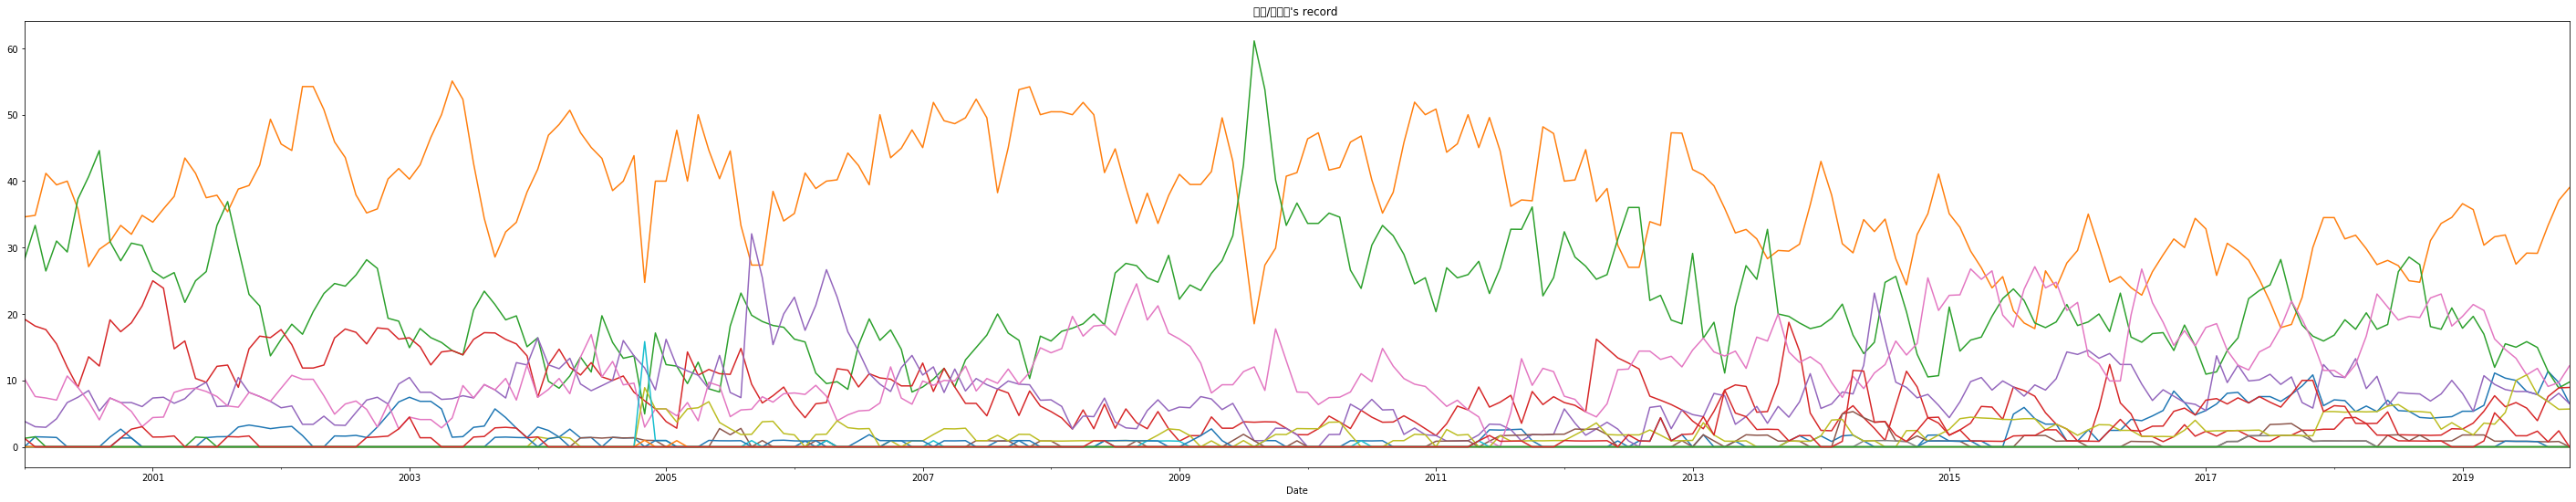

In [380]:
for key in mellon_df.keys():
    if key != 'Date' and key != '드라마OST' and key != '만화/게임OST' and key != '영화OST'and key != '-' and key != '애시드/퓨전/팝' and key != '클래식':
        mellon_df[key] = pd.to_numeric(mellon_df[key], errors='coerce')
        mellon_open = mellon_df[key].plot(title='%s\'s record '%key)
        fig = mellon_open.get_figure()
        fig.set_size_inches(50, 9)

=== 인디음악 ===


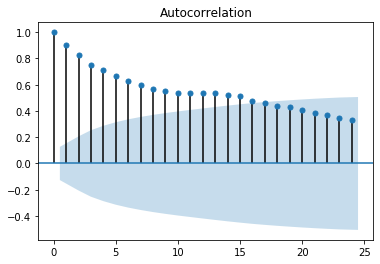

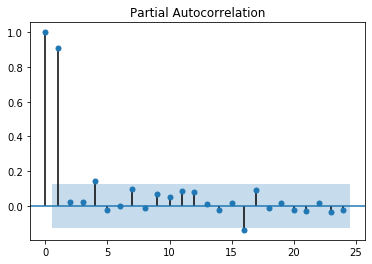

=== 발라드 ===


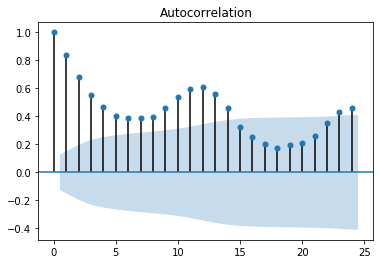

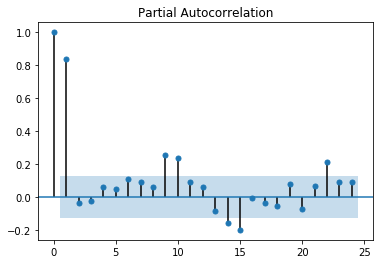

=== 댄스 ===


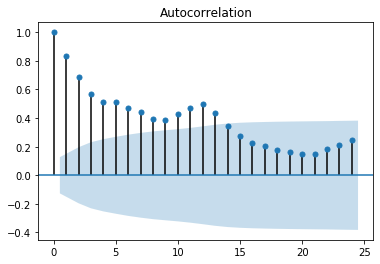

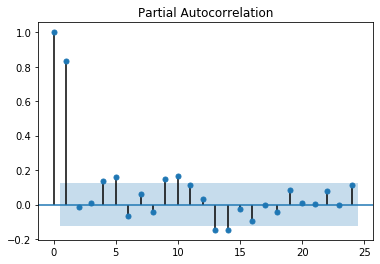

=== 록/메탈 ===


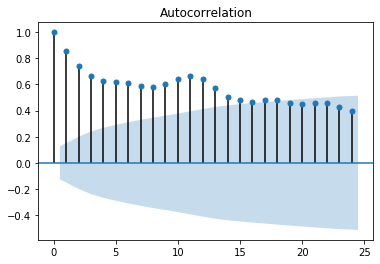

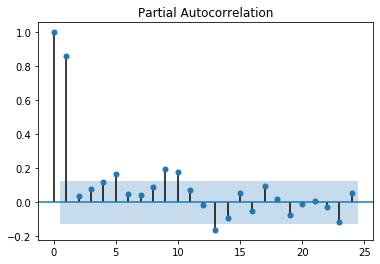

=== R&B/Soul ===


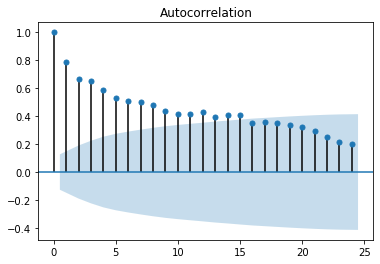

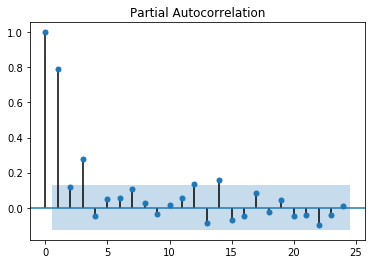

=== 일렉트로니카 ===


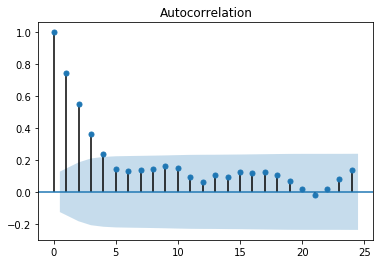

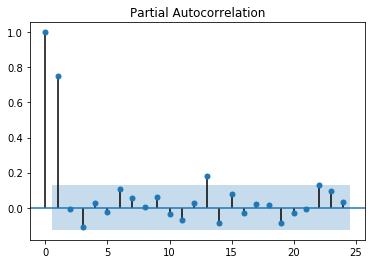

=== 랩/힙합 ===


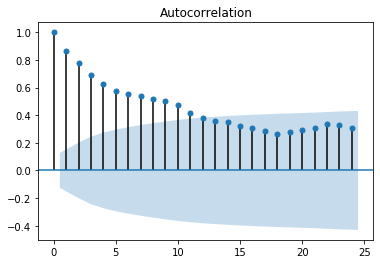

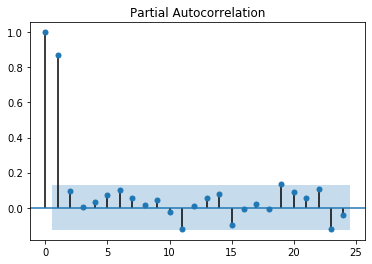

=== EDM ===


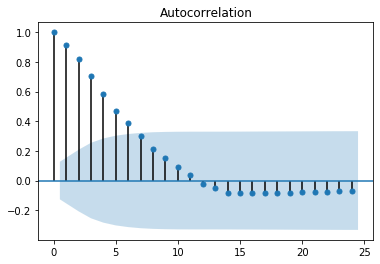

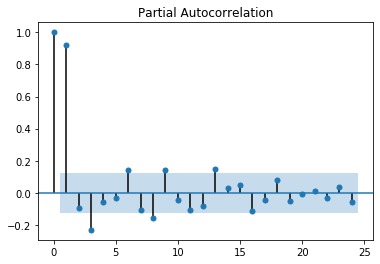

=== POP ===


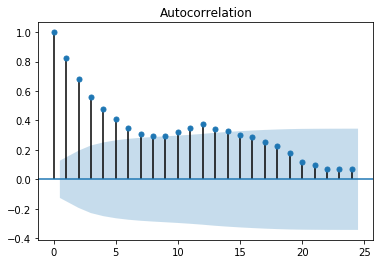

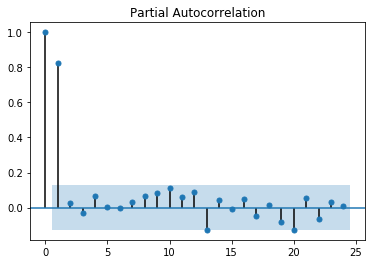

=== J-POP ===


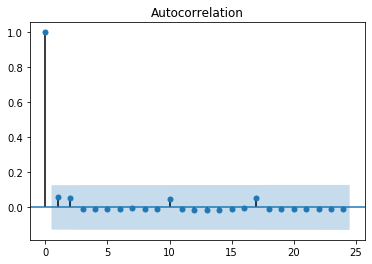

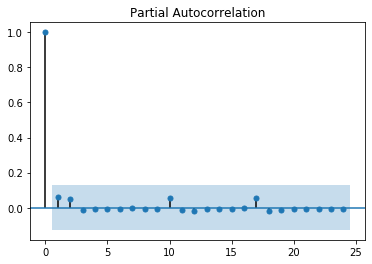

=== 성인가요 ===


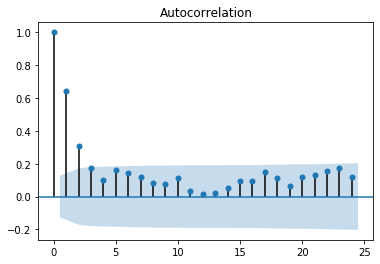

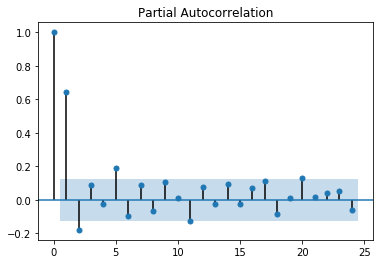

=== 재즈 ===


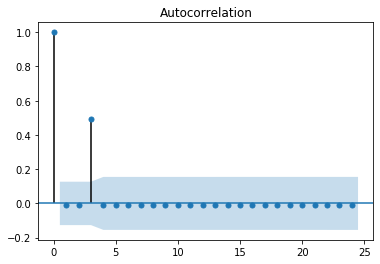

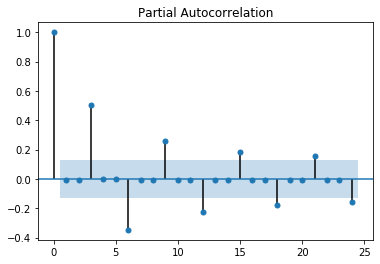

=== 뉴에이지 ===


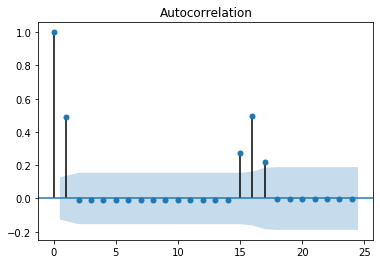

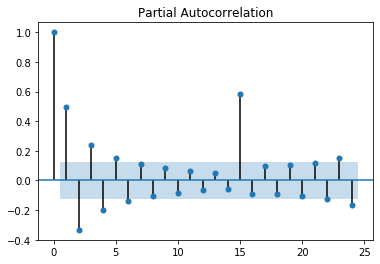

=== 포크/블루스 ===


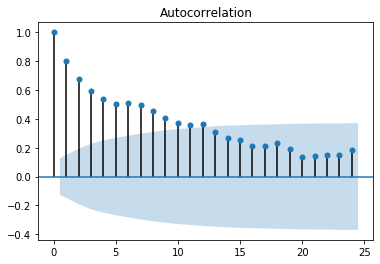

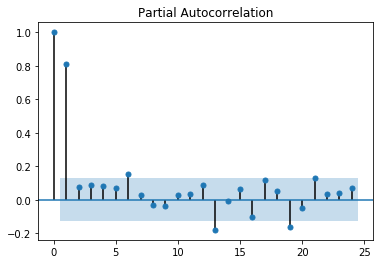

In [381]:
for key in mellon_df.keys():
    if key != 'Date' and key != '드라마OST' and key != '만화/게임OST' and key != '영화OST'and key != '-' and key != '애시드/퓨전/팝' and key != '클래식':
        print("===",key,"===")
        plot_acf(mellon_df[key])
        plot_pacf(mellon_df[key])
        plt.show()

=== 인디음악 ===


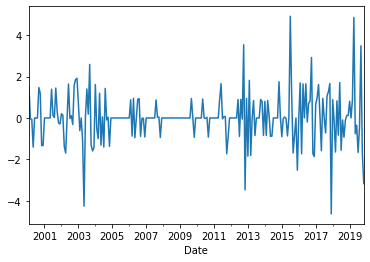

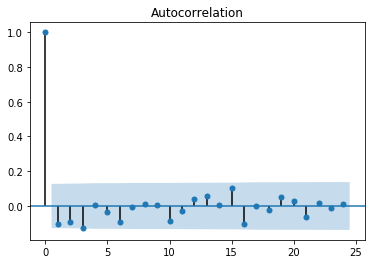

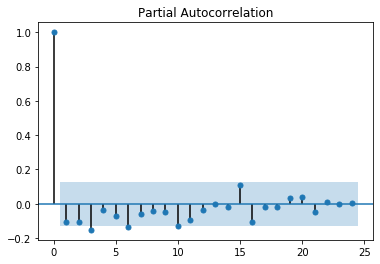

=== 발라드 ===


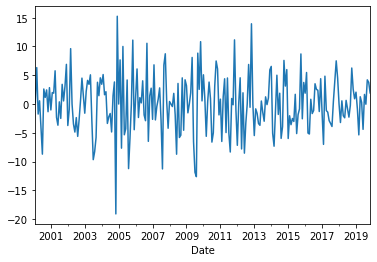

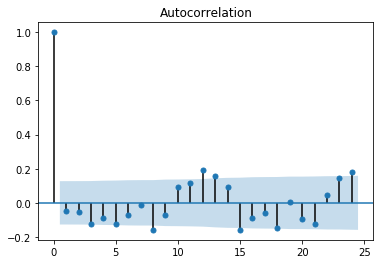

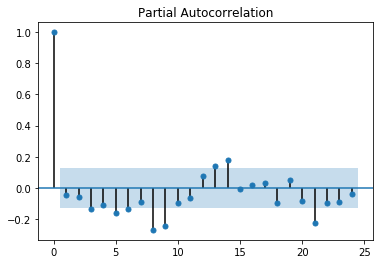

=== 댄스 ===


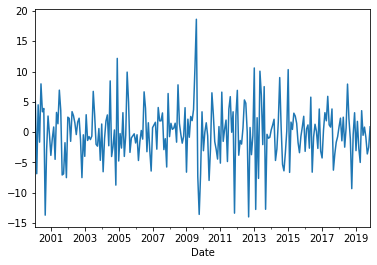

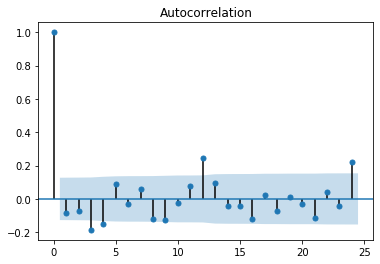

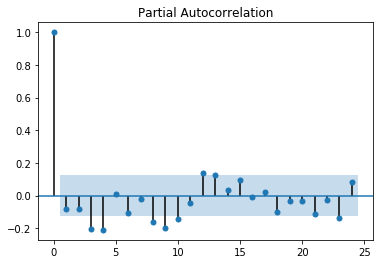

=== 록/메탈 ===


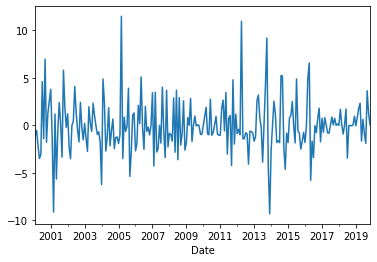

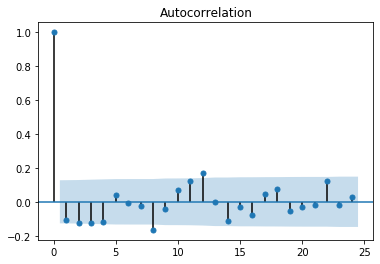

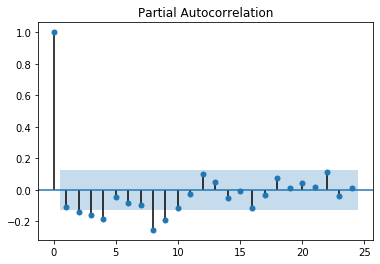

=== R&B/Soul ===


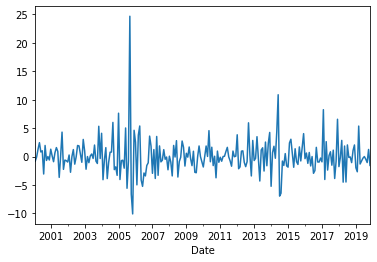

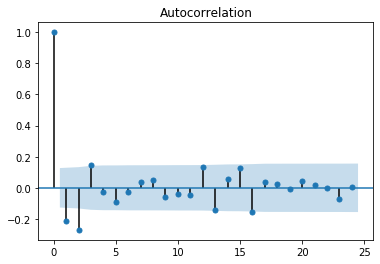

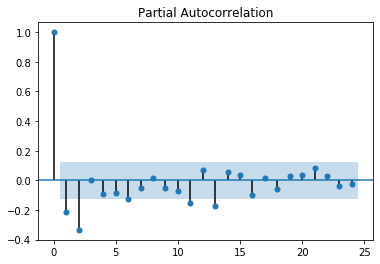

=== 일렉트로니카 ===


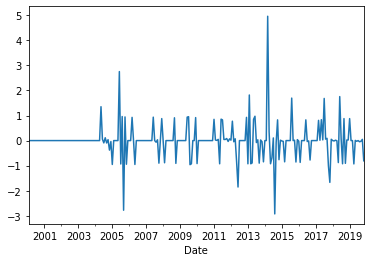

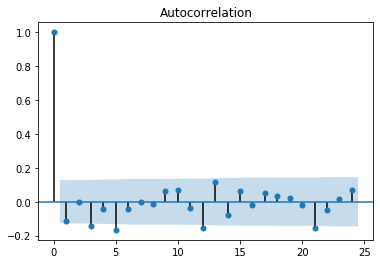

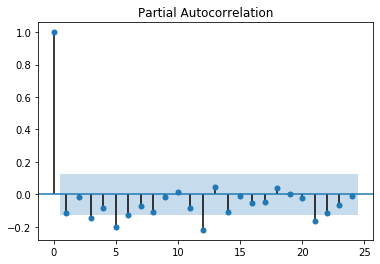

=== 랩/힙합 ===


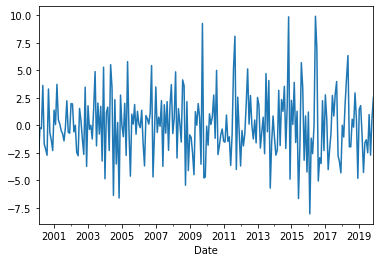

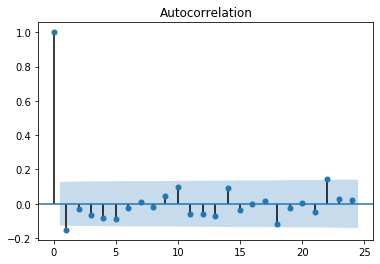

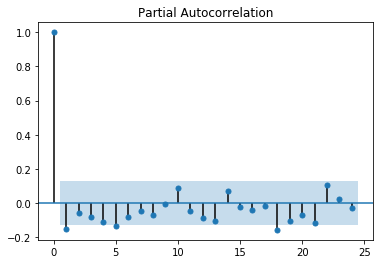

=== EDM ===


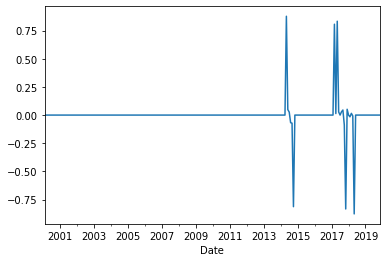

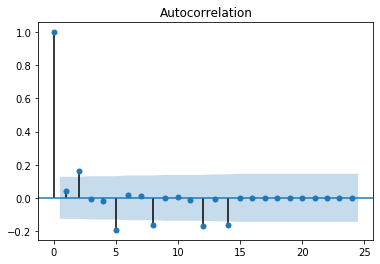

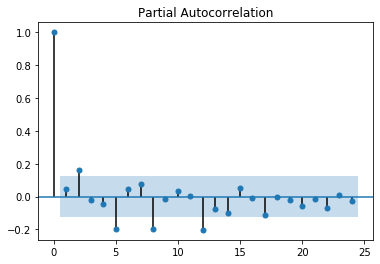

=== POP ===


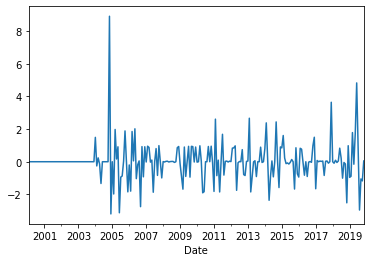

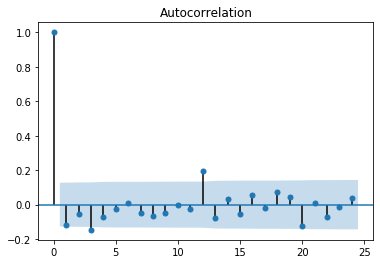

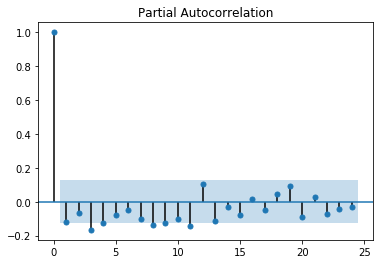

=== J-POP ===


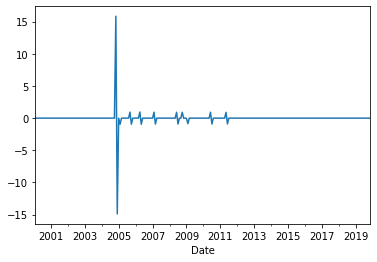

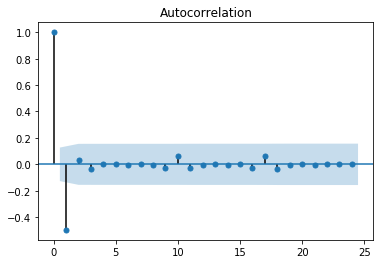

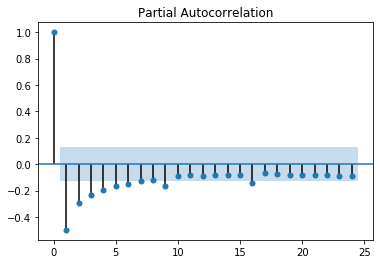

=== 성인가요 ===


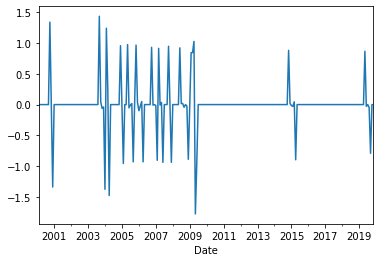

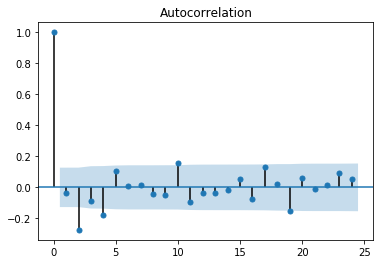

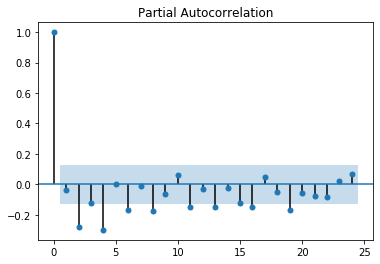

=== 재즈 ===


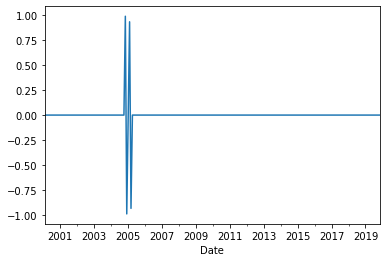

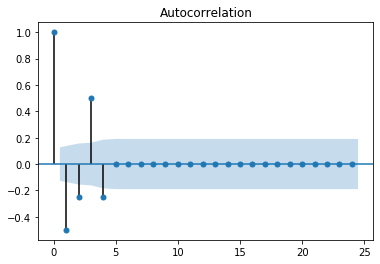

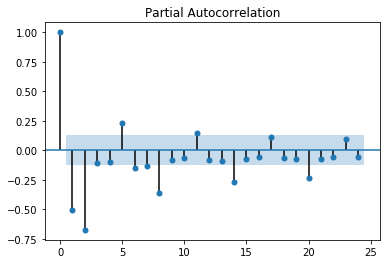

=== 뉴에이지 ===


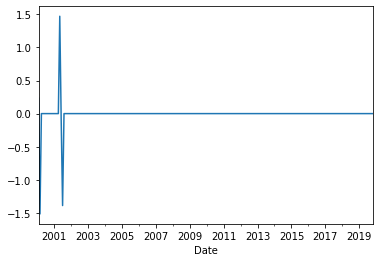

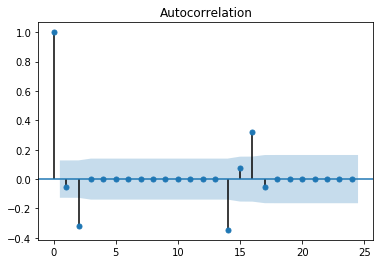

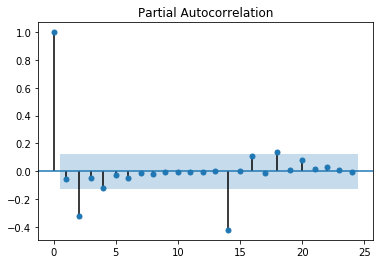

=== 포크/블루스 ===


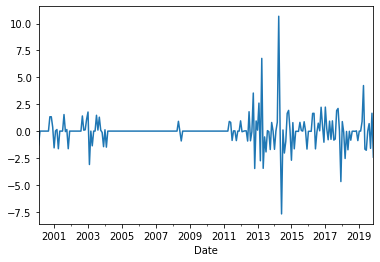

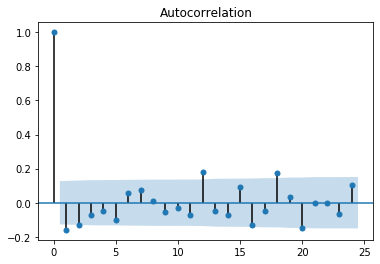

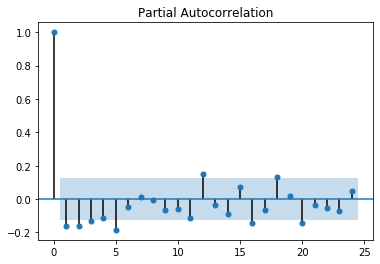

In [382]:
for key in mellon_df.keys():
    if key != 'Date' and key != '드라마OST' and key != '만화/게임OST' and key != '영화OST'and key != '-' and key != '애시드/퓨전/팝' and key != '클래식':
        print("===",key,"===")
        diff_1=mellon_df[key].diff(periods=1).iloc[1:]
        diff_1.plot()
        plot_acf(diff_1)
        plot_pacf(diff_1)
        plt.show()

In [383]:
int(len(mellon_a)/12)+1 #mellon_df[key]
key = '발라드'

In [384]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(mellon_df[key], order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.발라드   No. Observations:                  238
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -715.105
Method:                       css-mle   S.D. of innovations              4.883
Date:                Sun, 15 Dec 2019   AIC                           1436.210
Time:                        23:58:21   BIC                           1446.627
Sample:                    02-01-2000   HQIC                          1440.408
                         - 11-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0179      0.299      0.060      0.952      -0.569       0.605
ma.L1.D.발라드    -0.0540      0.070     -0.768      0.443      -0.192       0.084
                                    Roots       

C:\Users\jay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [385]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(mellon_df[key], order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.발라드   No. Observations:                  238
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -715.107
Method:                       css-mle   S.D. of innovations              4.883
Date:                Sun, 15 Dec 2019   AIC                           1434.214
Time:                        23:58:21   BIC                           1441.158
Sample:                    02-01-2000   HQIC                          1437.013
                         - 11-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ma.L1.D.발라드    -0.0540      0.070     -0.768      0.443      -0.192       0.084
                                    Roots                                    
                  Real          Imaginary         

C:\Users\jay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jay\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jay\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46300 missing from current font.
  f

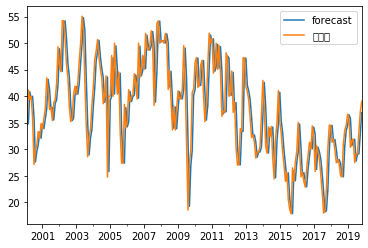

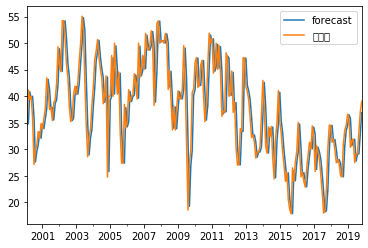

In [386]:
model_fit.plot_predict()

In [387]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([38.90865522]), array([4.88273913]), array([[29.33866238, 48.47864806]]))
